In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("HW1_var_18.csv", sep= ';')
df = df.drop(columns='Номер варианта')
df.head(10)

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,1000018,2НДФЛ,Покупка недвижимости/ строительство,0.0,0.59,женский,0,0,высшее,менеджер среднего звена,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000038,Поступление зарплаты на счет,Ремонт,0.0,0.59,мужской,2,0,высшее,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000058,2НДФЛ,Ремонт,1.0,0.24,мужской,0,0,*n.a.*,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000078,Поступление зарплаты на счет,Ремонт,1.0,0.49,женский,0,0,среднее-специальное,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000098,Поступление зарплаты на счет,Покупка автомобиля,1.0,0.31,женский,0,0,высшее,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1000118,2НДФЛ,Ремонт,1.0,0.34,мужской,0,0,среднее-специальное,рабочий,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1000138,Поступление зарплаты на счет,Покупка автомобиля,1.0,0.59,женский,0,0,высшее,специалист,...,0.0,8.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1000158,Свободная форма с печатью работодателя,Ремонт,1.0,0.18,мужской,0,0,высшее,менеджер среднего звена,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1000178,Форма банка (без печати работодателя),Ремонт,1.0,0.49,мужской,0,0,высшее,менеджер высшего звена,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1000198,Поступление зарплаты на счет,Другое,1.0,0.29,женский,0,0,высшее,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10242 entries, 0 to 10241
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10242 non-null  int64  
 1   INCOME_BASE_TYPE       10174 non-null  object 
 2   CREDIT_PURPOSE         10242 non-null  object 
 3   INSURANCE_FLAG         10240 non-null  float64
 4   DTI                    10114 non-null  object 
 5   SEX                    10242 non-null  object 
 6   FULL_AGE_CHILD_NUMBER  10242 non-null  int64  
 7   DEPENDANT_NUMBER       10242 non-null  int64  
 8   EDUCATION              10242 non-null  object 
 9   EMPL_TYPE              10237 non-null  object 
 10  EMPL_SIZE              10116 non-null  object 
 11  BANKACCOUNT_FLAG       7878 non-null   float64
 12  Period_at_work         7877 non-null   float64
 13  age                    7878 non-null   float64
 14  EMPL_PROPERTY          7878 non-null   object 
 15  EM

### **At first glance, it is notable that there are numerous omissions in the data, and some of the numeric values have a data type of 'object' (e.g., 'DTI').**

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()

    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'ID':
[1000018 1000038 1000058 ... 1204798 1204818 1204838]

Unique values in column 'INCOME_BASE_TYPE':
['2НДФЛ' 'Поступление зарплаты на счет'
 'Свободная форма с печатью работодателя'
 'Форма банка (без печати работодателя)' nan]

Unique values in column 'CREDIT_PURPOSE':
['Покупка недвижимости/ строительство' 'Ремонт' 'Покупка автомобиля'
 'Другое' 'Обучение' 'Покупка мебели' 'Отпуск' 'Покупка бытовой техники'
 'Покупка земли' 'Лечение']

Unique values in column 'INSURANCE_FLAG':
[ 0.  1. nan]

Unique values in column 'DTI':
['0.59' '0.24' '0.49' '0.31' '0.34' '0.18' '0.29' '0.46' '0.56' '0.52'
 '0.37' '0.21' '0.38' '0.51' '0.23' '0.22' '0.19' '0.17' '0.47' '0.3'
 '0.2' '0.44' '0.41' '0.16' nan '0.27' '0.33' '0.54' '0.14' '0.08' '0.39'
 '0.55' '0.43' '0.35' '0.32' '0.48' '0.57' '0.45' '0.58' '0.53' '0.26'
 '0.28' '0.36' '0.4' '0.06' '0.42' '0.13' '0.15' '0.5' '0.25' '0.07' '0.1'
 '0.12' '0.05' '0.09' '0.11' '0.04' '0.01' '#ПОЛЕ!' '0.03' '0.02' '0.63'
 '0']



In [ ]:
df['EDUCATION'] = df['EDUCATION'].replace('*n.a.*', np.nan)
df['DTI'] = df['DTI'].replace('#ПОЛЕ!', np.nan)
df['EMPL_SIZE'] = df['EMPL_SIZE'].replace('*n.a.*', np.nan)
df['BANKACCOUNT_FLAG'] = df['BANKACCOUNT_FLAG'].replace([3, 4], 2)
df['DTI'] = pd.to_numeric(df['DTI'])

### Let's look at the unique values in each of the columns. Note that the columns 'EDUCATION', 'DTI', 'EMPL_SIZE' contain errors when filling in, since they contain values such as '*n.a.*', '#ПОЛЕ!'.
### Replace these curves with NaN values, also in the 'BANKACCOUNT_FLAG' column (Number of accounts the client has. ( 0 - there is no online cabinet , 1 - there is one online cabinet, 2 or more - I entered the online cabinet from another device)) let's replace the values '3' and '4' with '2', since there is no difference between them for us.
### We will also convert the data in the 'DTI' column to the 'float' format. this is important for us because otherwise we will not be able to continue working with these values as with numbers

In [ ]:
data = {'column': df.columns}
dist_values_data = pd.DataFrame.from_dict(data)
dist_values_data['unique_values'] = dist_values_data['column'].apply(lambda x: df[x].nunique())
dist_values_data['%unique_values'] = dist_values_data['column'].apply(lambda x: round(df[x].nunique() / df[x].shape[0] * 100, 2))

dist_values_data['zero'] = dist_values_data['column'].apply(lambda x: df[x].eq(0).sum())
dist_values_data['%zero'] = dist_values_data['column'].apply(lambda x: round(df[x].eq(0).sum() / df[x].shape[0] * 100, 2))

dist_values_data['null'] = dist_values_data['column'].apply(lambda x: df[x].isnull().sum())
dist_values_data['%null'] = dist_values_data['column'].apply(lambda x: round(df[x].isnull().sum() / df[x].shape[0] * 100, 2))

dist_values_data

,column,unique_values,%unique_values,zero,%zero,null,%null
0,ID,10242,100.00,0,0.00,0,0.00
1,INCOME_BASE_TYPE,4,0.04,0,0.00,68,0.66
2,CREDIT_PURPOSE,10,0.10,0,0.00,0,0.00
3,INSURANCE_FLAG,2,0.02,4000,39.05,2,0.02
4,DTI,61,0.60,1,0.01,129,1.26
5,SEX,2,0.02,0,0.00,0,0.00
6,FULL_AGE_CHILD_NUMBER,7,0.07,6061,59.18,0,0.00
7,DEPENDANT_NUMBER,4,0.04,10207,99.66,0,0.00
8,EDUCATION,8,0.08,0,0.00,31,0.30
9,EMPL_TYPE,9,0.09,0,0.00,5,0.05


### **starting from the 'EMPL_FORM' column and ending with the 'ninety_vintage' column, values are missing in more than 60% of the data**
### **let's examine these omissions in more detail**

In [ ]:
rows_with_nan_in_family = df[df['FAMILY_STATUS'].isna()]
data = {'column': rows_with_nan_in_family.columns}
dist_values_data = pd.DataFrame.from_dict(data)
dist_values_data['unique_values'] = dist_values_data['column'].apply(lambda x: rows_with_nan_in_family[x].nunique())
dist_values_data['%unique_values'] = dist_values_data['column'].apply(lambda x: round(rows_with_nan_in_family[x].nunique() / rows_with_nan_in_family[x].shape[0] * 100, 2))

dist_values_data['zero'] = dist_values_data['column'].apply(lambda x: rows_with_nan_in_family[x].eq(0).sum())
dist_values_data['%zero'] = dist_values_data['column'].apply(lambda x: round(rows_with_nan_in_family[x].eq(0).sum() / rows_with_nan_in_family[x].shape[0] * 100, 2))

dist_values_data['null'] = dist_values_data['column'].apply(lambda x: rows_with_nan_in_family[x].isnull().sum())
dist_values_data['%null'] = dist_values_data['column'].apply(lambda x: round(rows_with_nan_in_family[x].isnull().sum() / rows_with_nan_in_family[x].shape[0] * 100, 2))

dist_values_data

,column,unique_values,%unique_values,zero,%zero,null,%null
0,ID,6282,100.00,0,0.00,0,0.00
1,INCOME_BASE_TYPE,4,0.06,0,0.00,68,1.08
2,CREDIT_PURPOSE,10,0.16,0,0.00,0,0.00
3,INSURANCE_FLAG,2,0.03,2481,39.49,1,0.02
4,DTI,61,0.97,1,0.02,127,2.02
5,SEX,2,0.03,0,0.00,0,0.00
6,FULL_AGE_CHILD_NUMBER,6,0.10,3586,57.08,0,0.00
7,DEPENDANT_NUMBER,4,0.06,6258,99.62,0,0.00
8,EDUCATION,8,0.13,0,0.00,13,0.21
9,EMPL_TYPE,9,0.14,0,0.00,5,0.08


In [ ]:
rows_with_nan_in_family.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 1 to 10241
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     6282 non-null   int64  
 1   INCOME_BASE_TYPE       6214 non-null   object 
 2   CREDIT_PURPOSE         6282 non-null   object 
 3   INSURANCE_FLAG         6281 non-null   float64
 4   DTI                    6155 non-null   float64
 5   SEX                    6282 non-null   object 
 6   FULL_AGE_CHILD_NUMBER  6282 non-null   int64  
 7   DEPENDANT_NUMBER       6282 non-null   int64  
 8   EDUCATION              6269 non-null   object 
 9   EMPL_TYPE              6277 non-null   object 
 10  EMPL_SIZE              6156 non-null   object 
 11  BANKACCOUNT_FLAG       3918 non-null   float64
 12  Period_at_work         3917 non-null   float64
 13  age                    3918 non-null   float64
 14  EMPL_PROPERTY          3918 non-null   object 
 15  EMP

### from our original dataset, we will select the lines in which there are gaps in the 'FAMILY_STATUS' column. Next, we will check for gaps in other columns among the selected data.
### Note that in 100% of the data, if there is a pass in the columns 'FAMILY_STATUS', then there is a pass in the columns starting with 'EMPL_FORM' and ending with 'ninety_vintage' column. (that is 27 columns).

In [ ]:
df = df.dropna(subset=['FAMILY_STATUS'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3960 entries, 0 to 10240
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3960 non-null   int64  
 1   INCOME_BASE_TYPE       3960 non-null   object 
 2   CREDIT_PURPOSE         3960 non-null   object 
 3   INSURANCE_FLAG         3959 non-null   float64
 4   DTI                    3958 non-null   float64
 5   SEX                    3960 non-null   object 
 6   FULL_AGE_CHILD_NUMBER  3960 non-null   int64  
 7   DEPENDANT_NUMBER       3960 non-null   int64  
 8   EDUCATION              3942 non-null   object 
 9   EMPL_TYPE              3960 non-null   object 
 10  EMPL_SIZE              3959 non-null   object 
 11  BANKACCOUNT_FLAG       3960 non-null   float64
 12  Period_at_work         3960 non-null   float64
 13  age                    3960 non-null   float64
 14  EMPL_PROPERTY          3960 non-null   object 
 15  EMP

### for further work with the data, it was decided to delete all rows that have a pass in the "FAMILY_STATUS" column, since omissions will not allow for high-quality segmentation, and it is impossible to restore or replace the data.

In [ ]:
df.reset_index(drop=True)
df

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,1000018,2НДФЛ,Покупка недвижимости/ строительство,0.0,0.59,женский,0,0,высшее,менеджер среднего звена,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000078,Поступление зарплаты на счет,Ремонт,1.0,0.49,женский,0,0,среднее-специальное,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1000138,Поступление зарплаты на счет,Покупка автомобиля,1.0,0.59,женский,0,0,высшее,специалист,...,0.0,8.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1000158,Свободная форма с печатью работодателя,Ремонт,1.0,0.18,мужской,0,0,высшее,менеджер среднего звена,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1000238,Поступление зарплаты на счет,Ремонт,0.0,0.56,женский,1,0,второе высшее,менеджер среднего звена,...,1.0,10.0,92.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,1204678,Свободная форма с печатью работодателя,Ремонт,1.0,0.59,женский,0,0,Высшее/Второе высшее/Ученая степень,специалист,...,0.0,13.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10234,1204698,Поступление зарплаты на счет,Покупка автомобиля,1.0,0.44,мужской,0,0,высшее,вспомогательный персонал,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10235,1204718,2НДФЛ,Покупка автомобиля,1.0,0.59,женский,0,0,высшее,специалист,...,1.0,3.0,29.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
10236,1204738,Форма банка (без печати работодателя),Ремонт,1.0,0.55,женский,1,0,среднее-специальное,вспомогательный персонал,...,0.0,9.0,96.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


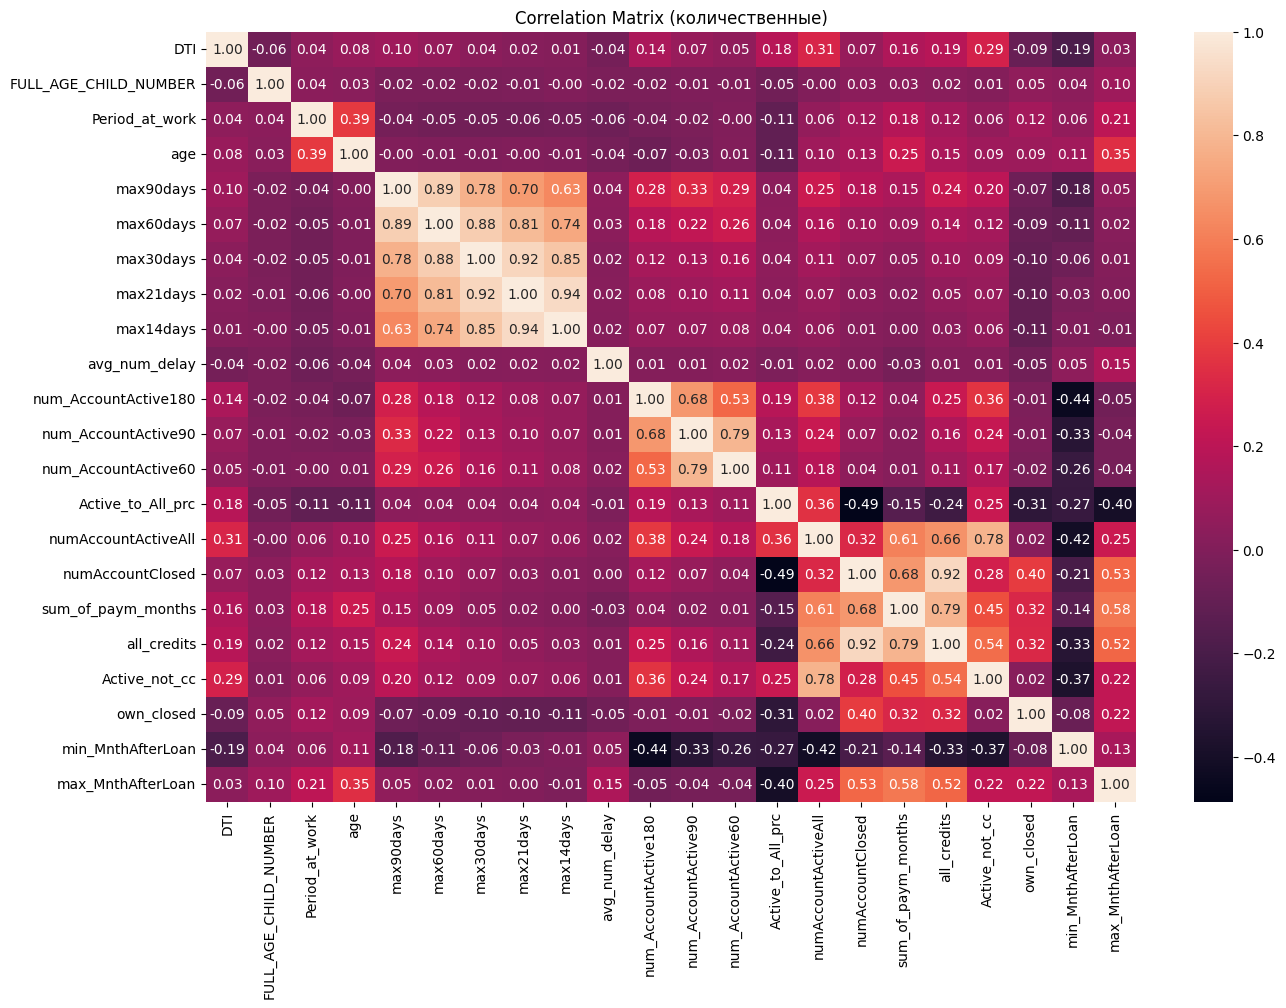

In [ ]:
columns_num = ['DTI', 'FULL_AGE_CHILD_NUMBER', 'Period_at_work', 'age', 'max90days', 'max60days', 'max30days', 'max21days', 'max14days', 'avg_num_delay', 'num_AccountActive180','num_AccountActive90','num_AccountActive60','Active_to_All_prc','numAccountActiveAll','numAccountClosed','sum_of_paym_months','all_credits','Active_not_cc','own_closed','min_MnthAfterLoan','max_MnthAfterLoan']
subset = df[columns_num]
plt.figure(figsize=(15, 10))
corr_matrix = subset.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix (количественные)')
plt.show()


### we also see that about 250 more lines have gaps in the columns 23-42
### since the number of lines with omissions is approximately equal in each column, I suggest trying to delete the lines with omissions in "avg_num_delay"
### the 'avg_num_delay' indicator is important to us, and as can be seen from the correlation matrix, we can't just calculate it, and replacing the missing values with averages or other ways to fill in the missing values will not work because the uniqueness of this indicator is important to us
### The use the same logic with column "EDUCATION"
### therefore, we delete the lines in which these columns are omitted
### Lets see the result



In [ ]:
df = df[df['avg_num_delay'].notna()]
df = df[df['EDUCATION'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3662 entries, 6 to 10240
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3662 non-null   int64  
 1   INCOME_BASE_TYPE       3662 non-null   object 
 2   CREDIT_PURPOSE         3662 non-null   object 
 3   INSURANCE_FLAG         3661 non-null   float64
 4   DTI                    3660 non-null   float64
 5   SEX                    3662 non-null   object 
 6   FULL_AGE_CHILD_NUMBER  3662 non-null   int64  
 7   DEPENDANT_NUMBER       3662 non-null   int64  
 8   EDUCATION              3662 non-null   object 
 9   EMPL_TYPE              3662 non-null   object 
 10  EMPL_SIZE              3662 non-null   object 
 11  BANKACCOUNT_FLAG       3662 non-null   float64
 12  Period_at_work         3662 non-null   float64
 13  age                    3662 non-null   float64
 14  EMPL_PROPERTY          3662 non-null   object 
 15  EMP

### As we can see, almost all the lines with omissions have been deleted, that is, our assumption turned out to be correct
### Next, select the remaining lines with omissions

In [ ]:
rows_to_delete = df[df.isnull().any(axis=1)]
rows_to_delete

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
23,1000478,Форма банка (без печати работодателя),Другое,0.0,0.19,женский,0,0,Высшее/Второе высшее/Ученая степень,менеджер по продажам,...,0.0,21.0,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2663,1053278,Поступление зарплаты на счет,Ремонт,0.0,NaN,мужской,1,0,высшее,специалист,...,4.0,16.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3496,1069938,2НДФЛ,Покупка автомобиля,1.0,0.49,женский,1,0,высшее,вспомогательный персонал,...,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4365,1087318,2НДФЛ,Ремонт,NaN,NaN,мужской,0,0,Высшее/Второе высшее/Ученая степень,торговый представитель,...,0.0,6.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7545,1150918,Форма банка (без печати работодателя),Ремонт,1.0,0.41,женский,0,0,Высшее/Второе высшее/Ученая степень,специалист,...,0.0,17.0,28.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### There are only 5 lines here, so we can delete them without losing the quality of the final result

In [ ]:
df = df.drop(rows_to_delete.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3657 entries, 6 to 10240
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3657 non-null   int64  
 1   INCOME_BASE_TYPE       3657 non-null   object 
 2   CREDIT_PURPOSE         3657 non-null   object 
 3   INSURANCE_FLAG         3657 non-null   float64
 4   DTI                    3657 non-null   float64
 5   SEX                    3657 non-null   object 
 6   FULL_AGE_CHILD_NUMBER  3657 non-null   int64  
 7   DEPENDANT_NUMBER       3657 non-null   int64  
 8   EDUCATION              3657 non-null   object 
 9   EMPL_TYPE              3657 non-null   object 
 10  EMPL_SIZE              3657 non-null   object 
 11  BANKACCOUNT_FLAG       3657 non-null   float64
 12  Period_at_work         3657 non-null   float64
 13  age                    3657 non-null   float64
 14  EMPL_PROPERTY          3657 non-null   object 
 15  EMP

### **That's all! Now we have clean data**



### **Let's examine some distribution plots**

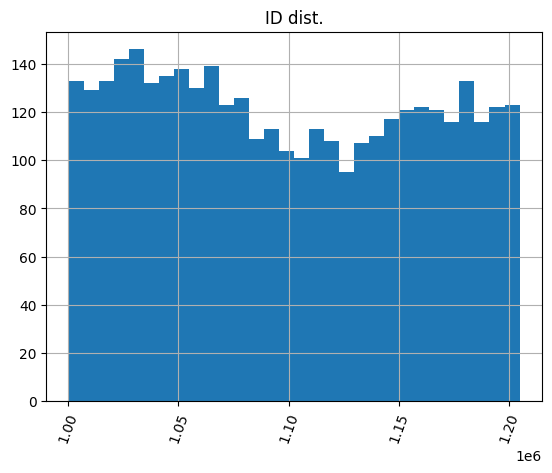

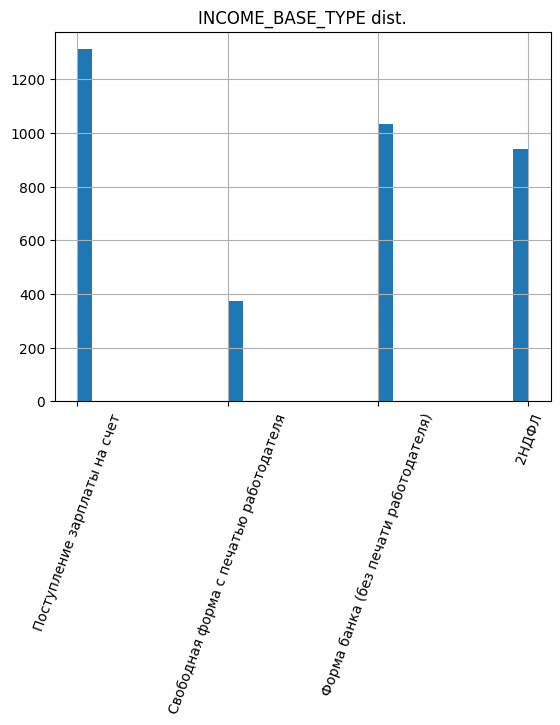

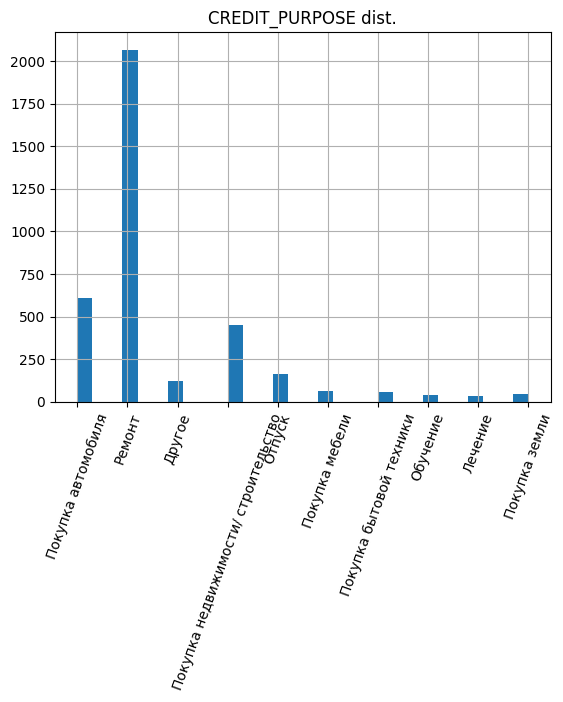

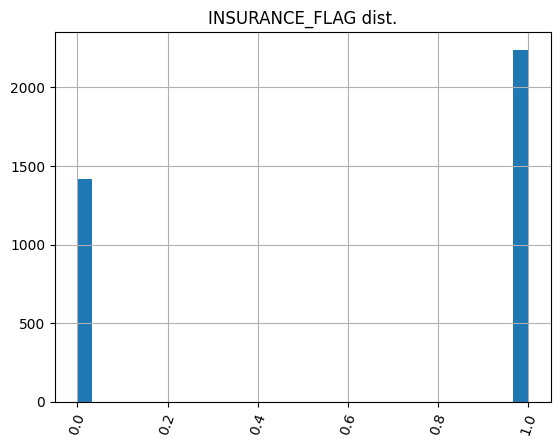

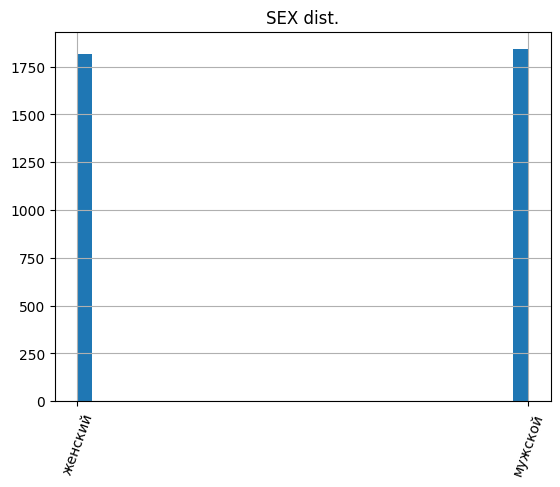

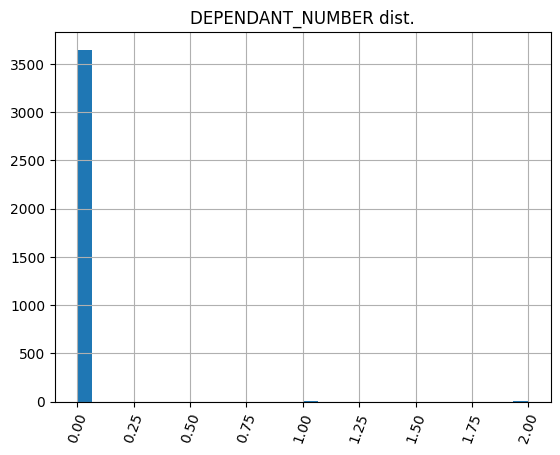

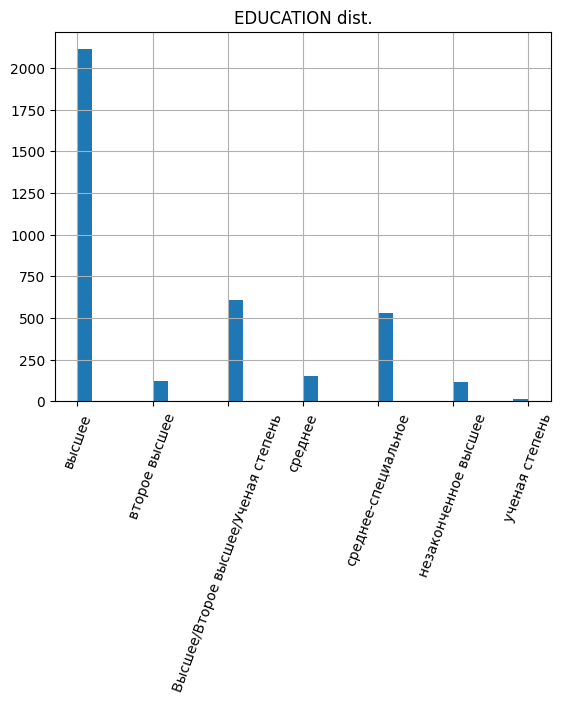

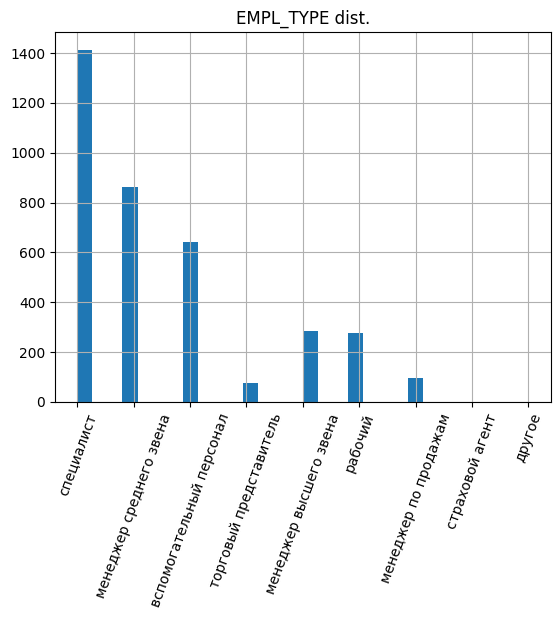

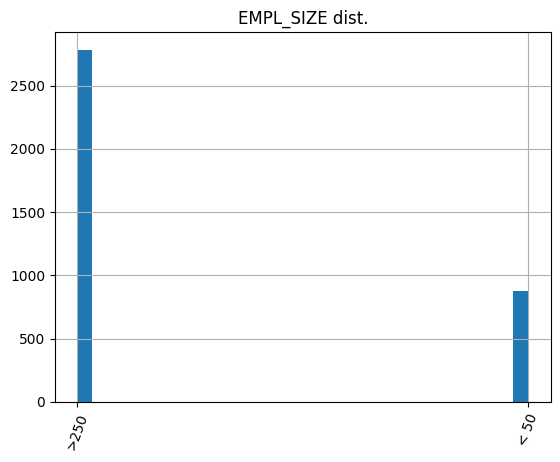

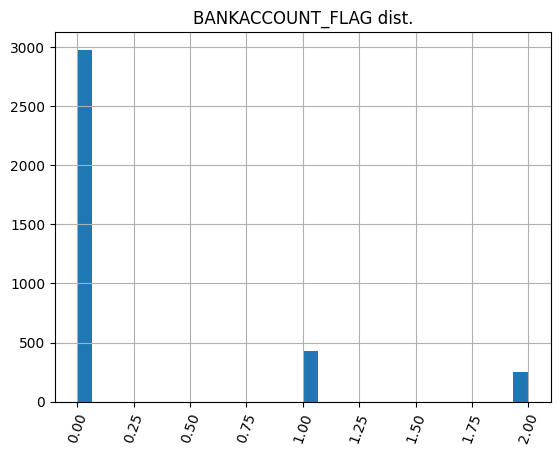

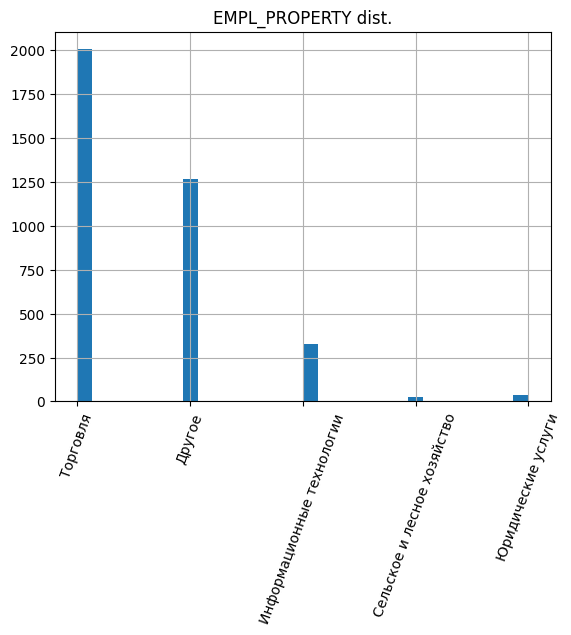

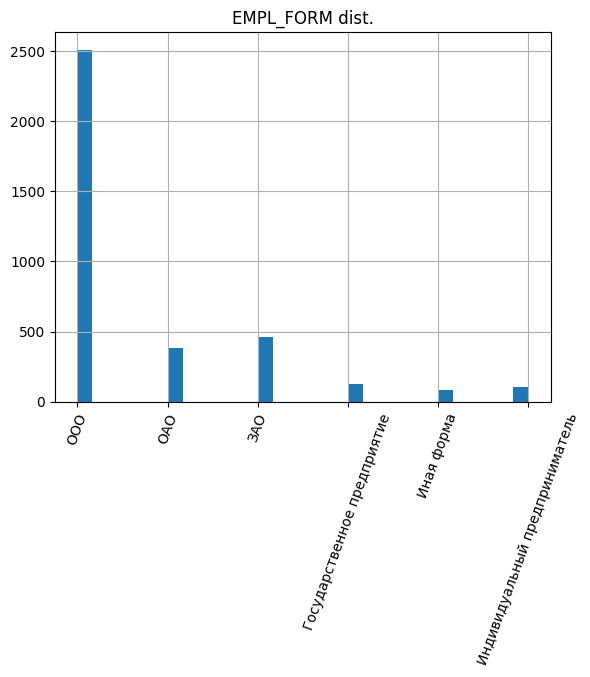

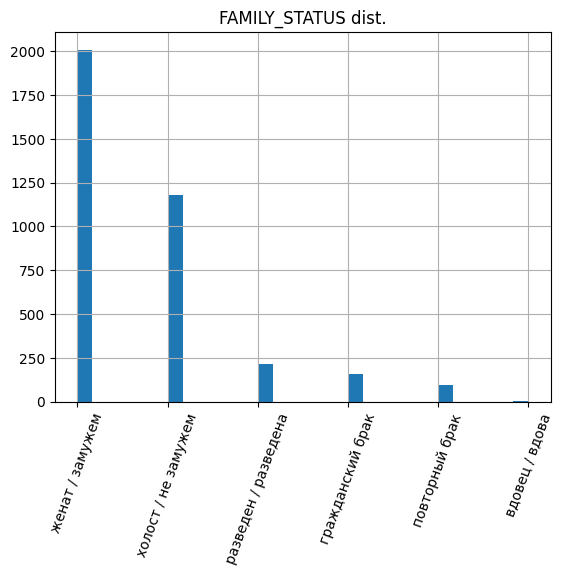

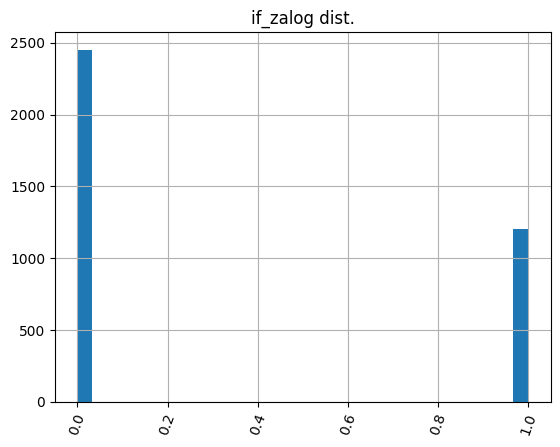

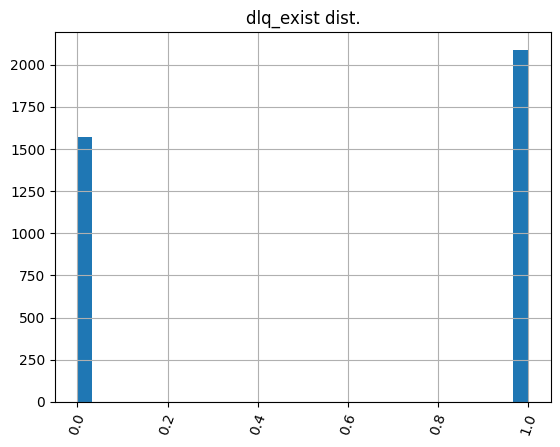

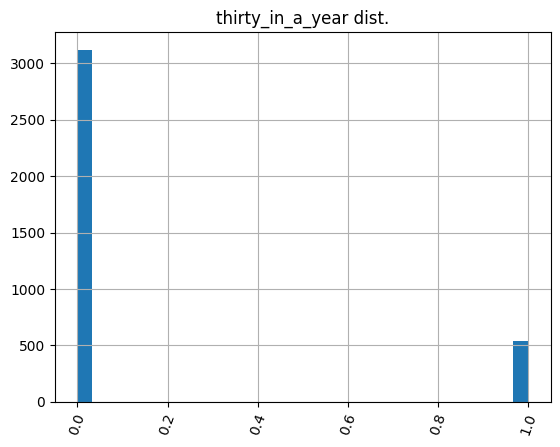

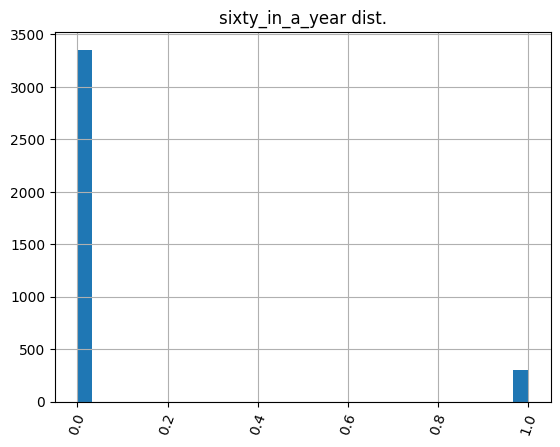

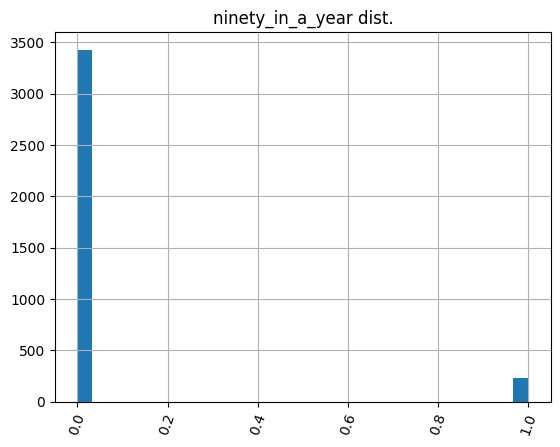

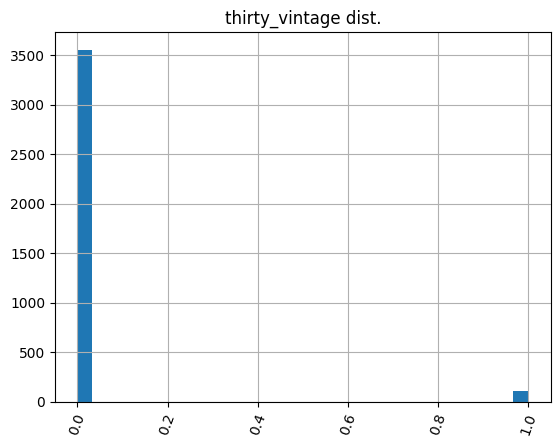

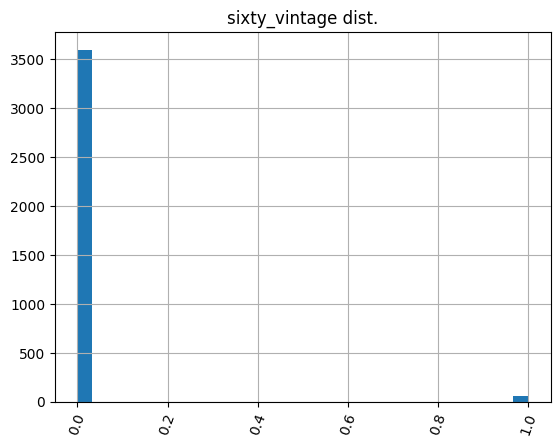

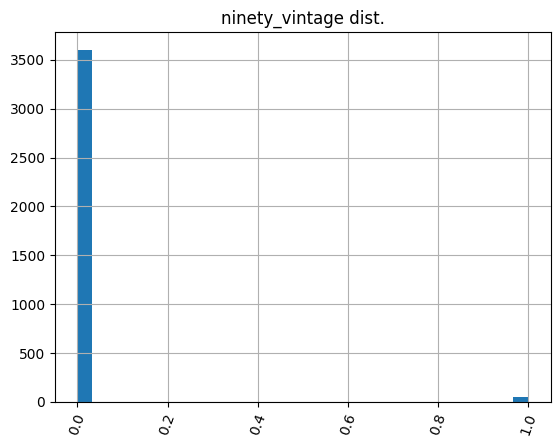

In [ ]:
for column in df.columns:
    if column not in columns_num:
        df[column].hist(bins=30)
        plt.title(column + ' dist.')
        plt.xticks(rotation=70)
        plt.show()

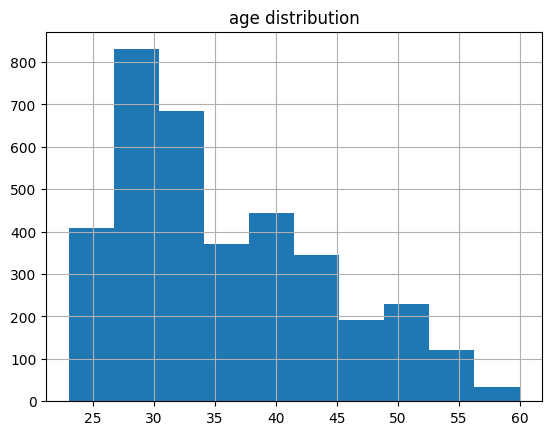

In [ ]:
df['age'].hist()
plt.title('age distribution')
plt.xticks(rotation=0)
plt.show()


In [ ]:
subset_num = df[columns_num]
subset_num.describe()

,DTI,FULL_AGE_CHILD_NUMBER,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,...,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan
count,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,...,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000
mean,0.397052,0.511075,56.106645,35.800656,1.646978,1.162428,0.852611,0.635220,0.517637,0.060843,...,0.102270,0.430185,2.238173,3.517637,81.058244,5.755811,1.120591,0.725458,13.585179,61.331146
std,0.134842,0.743646,55.564161,8.390296,1.976147,1.636522,1.397829,1.203499,1.072471,0.114068,...,0.348391,0.283555,1.662887,3.215165,69.909962,4.063195,1.070775,1.092840,14.608323,30.392320
min,0.010000,0.000000,6.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.300000,0.000000,17.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.250000,1.000000,1.000000,30.000000,3.000000,0.000000,0.000000,4.000000,35.000000
50%,0.420000,0.000000,40.000000,34.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.013699,...,0.000000,0.400000,2.000000,3.000000,63.000000,5.000000,1.000000,0.000000,9.000000,67.000000
75%,0.490000,1.000000,76.000000,42.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.071429,...,0.000000,0.600000,3.000000,5.000000,114.000000,8.000000,2.000000,1.000000,17.000000,87.000000
max,0.590000,6.000000,425.000000,60.000000,18.000000,16.000000,15.000000,14.000000,14.000000,0.965517,...,3.000000,1.000000,14.000000,28.000000,656.000000,34.000000,6.000000,17.000000,105.000000,172.000000


### There is a table with the basic characteristics of the numerical variables of the data

### **We start to prepare our data for clustering**

In [ ]:
columns_num #numeric columns

['DTI',
 'FULL_AGE_CHILD_NUMBER',
 'Period_at_work',
 'age',
 'max90days',
 'max60days',
 'max30days',
 'max21days',
 'max14days',
 'avg_num_delay',
 'num_AccountActive180',
 'num_AccountActive90',
 'num_AccountActive60',
 'Active_to_All_prc',
 'numAccountActiveAll',
 'numAccountClosed',
 'sum_of_paym_months',
 'all_credits',
 'Active_not_cc',
 'own_closed',
 'min_MnthAfterLoan',
 'max_MnthAfterLoan']

In [ ]:
all_columns = [col for col in df.columns if col != 'ID']
columns_cat = list(set(all_columns) - set(columns_num))


new_cat_columns = []


def one_hot(df, cols):
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False).astype(int)
        df = pd.concat([df, dummies], axis=1)
        for c in dummies.columns:
            new_cat_columns.append(c)
    return df

In [ ]:
columns_cat #категориальные колонки

['EMPL_PROPERTY',
 'thirty_vintage',
 'DEPENDANT_NUMBER',
 'EMPL_SIZE',
 'INCOME_BASE_TYPE',
 'FAMILY_STATUS',
 'BANKACCOUNT_FLAG',
 'CREDIT_PURPOSE',
 'SEX',
 'ninety_vintage',
 'INSURANCE_FLAG',
 'sixty_vintage',
 'EMPL_TYPE',
 'thirty_in_a_year',
 'if_zalog',
 'sixty_in_a_year',
 'ninety_in_a_year',
 'EMPL_FORM',
 'dlq_exist',
 'EDUCATION']

In [ ]:
df = one_hot(df, columns_cat)

In [ ]:
df.drop(columns = columns_cat, inplace = True)
df

,ID,DTI,FULL_AGE_CHILD_NUMBER,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,...,EMPL_FORM_ООО,dlq_exist_0.0,dlq_exist_1.0,EDUCATION_Высшее/Второе высшее/Ученая степень,EDUCATION_второе высшее,EDUCATION_высшее,EDUCATION_незаконченное высшее,EDUCATION_среднее,EDUCATION_среднее-специальное,EDUCATION_ученая степень
6,1000138,0.59,0,35.0,29.0,2.0,2.0,1.0,1.0,1.0,...,1,1,0,0,0,1,0,0,0,0
11,1000238,0.56,1,40.0,43.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,1,0,0,0,0,0
14,1000298,0.21,0,27.0,30.0,1.0,1.0,1.0,1.0,1.0,...,0,1,0,0,0,1,0,0,0,0
16,1000338,0.38,1,72.0,30.0,2.0,2.0,2.0,2.0,2.0,...,1,0,1,0,0,1,0,0,0,0
21,1000438,0.52,0,33.0,28.0,3.0,3.0,3.0,1.0,1.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1204658,0.33,0,57.0,33.0,2.0,1.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,1,0
10233,1204678,0.59,0,7.0,30.0,2.0,2.0,2.0,2.0,2.0,...,0,1,0,1,0,0,0,0,0,0
10235,1204718,0.59,0,17.0,27.0,3.0,3.0,3.0,2.0,1.0,...,0,0,1,0,0,1,0,0,0,0
10236,1204738,0.55,1,222.0,49.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0


### Do OneHotEncoding for categorical features and delete old columns

## **METHOD 1**
### KMeans

In [ ]:
data = df.drop('ID', axis=1)
data

,DTI,FULL_AGE_CHILD_NUMBER,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,...,EMPL_FORM_ООО,dlq_exist_0.0,dlq_exist_1.0,EDUCATION_Высшее/Второе высшее/Ученая степень,EDUCATION_второе высшее,EDUCATION_высшее,EDUCATION_незаконченное высшее,EDUCATION_среднее,EDUCATION_среднее-специальное,EDUCATION_ученая степень
6,0.59,0,35.0,29.0,2.0,2.0,1.0,1.0,1.0,0.000000,...,1,1,0,0,0,1,0,0,0,0
11,0.56,1,40.0,43.0,0.0,0.0,0.0,0.0,0.0,0.159420,...,1,0,1,0,1,0,0,0,0,0
14,0.21,0,27.0,30.0,1.0,1.0,1.0,1.0,1.0,0.000000,...,0,1,0,0,0,1,0,0,0,0
16,0.38,1,72.0,30.0,2.0,2.0,2.0,2.0,2.0,0.018519,...,1,0,1,0,0,1,0,0,0,0
21,0.52,0,33.0,28.0,3.0,3.0,3.0,1.0,1.0,0.000000,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0.33,0,57.0,33.0,2.0,1.0,0.0,0.0,0.0,0.028169,...,1,0,1,0,0,0,0,0,1,0
10233,0.59,0,7.0,30.0,2.0,2.0,2.0,2.0,2.0,0.000000,...,0,1,0,1,0,0,0,0,0,0
10235,0.59,0,17.0,27.0,3.0,3.0,3.0,2.0,1.0,0.185185,...,0,0,1,0,0,1,0,0,0,0
10236,0.55,1,222.0,49.0,0.0,0.0,0.0,0.0,0.0,0.031008,...,0,0,1,0,0,0,0,0,1,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

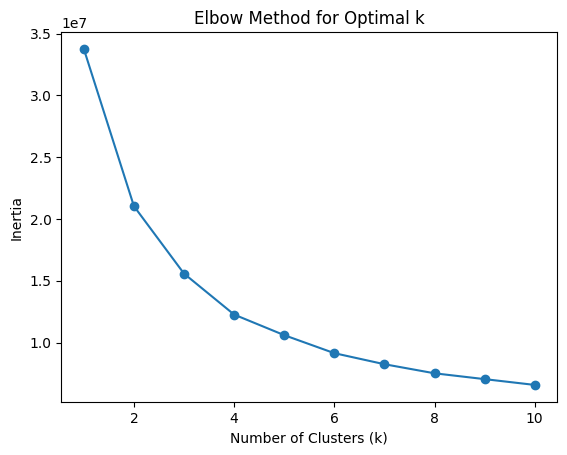

In [ ]:
from sklearn.cluster import KMeans


# Range of cluster numbers to try
k_values = range(1, 11)

# Store inertia values for each k
inertia_values = []

for k in k_values:
    # Fit KMeans clustering
    kmeans = KMeans(n_clusters=k).fit(data)
    kmeans.fit(data)

    # Append inertia to list
    inertia_values.append(kmeans.inertia_)

# Plot inertia values for different k
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### We are conducting a study on the optimal number of clusters using Elbow method.
### As can be seen from the graph, the optimal division is into 5-6 classes. For further work, I have selected 5 clusters(так как когда я брала 6 два кластера получались очень одинаковыми)


In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)
df['cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['cluster'].unique()

array([0, 3, 1, 4, 2], dtype=int32)

In [ ]:
df


,ID,DTI,FULL_AGE_CHILD_NUMBER,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,...,dlq_exist_0.0,dlq_exist_1.0,EDUCATION_Высшее/Второе высшее/Ученая степень,EDUCATION_второе высшее,EDUCATION_высшее,EDUCATION_незаконченное высшее,EDUCATION_среднее,EDUCATION_среднее-специальное,EDUCATION_ученая степень,cluster
6,1000138,0.59,0,35.0,29.0,2.0,2.0,1.0,1.0,1.0,...,1,0,0,0,1,0,0,0,0,0
11,1000238,0.56,1,40.0,43.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,3
14,1000298,0.21,0,27.0,30.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,1,0,0,0,0,0
16,1000338,0.38,1,72.0,30.0,2.0,2.0,2.0,2.0,2.0,...,0,1,0,0,1,0,0,0,0,1
21,1000438,0.52,0,33.0,28.0,3.0,3.0,3.0,1.0,1.0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1204658,0.33,0,57.0,33.0,2.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
10233,1204678,0.59,0,7.0,30.0,2.0,2.0,2.0,2.0,2.0,...,1,0,1,0,0,0,0,0,0,0
10235,1204718,0.59,0,17.0,27.0,3.0,3.0,3.0,2.0,1.0,...,0,1,0,0,1,0,0,0,0,0
10236,1204738,0.55,1,222.0,49.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,2


## A brief description of each cluster will be provided below

### Кластер 1

In [ ]:
df.query('cluster==0')[columns_num].mean().round(2)


DTI                       0.39
FULL_AGE_CHILD_NUMBER     0.44
Period_at_work           27.58
age                      32.71
max90days                 1.51
max60days                 1.13
max30days                 0.85
max21days                 0.65
max14days                 0.54
avg_num_delay             0.07
num_AccountActive180      0.39
num_AccountActive90       0.18
num_AccountActive60       0.11
Active_to_All_prc         0.50
numAccountActiveAll       1.60
numAccountClosed          1.80
sum_of_paym_months       32.89
all_credits               3.40
Active_not_cc             0.79
own_closed                0.38
min_MnthAfterLoan        13.76
max_MnthAfterLoan        40.72
dtype: float64

In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df.query('cluster==0')[new_cat_columns].median())

EMPL_PROPERTY_Другое                                       0.0
EMPL_PROPERTY_Информационные технологии                    0.0
EMPL_PROPERTY_Сельское и лесное хозяйство                  0.0
EMPL_PROPERTY_Торговля                                     1.0
EMPL_PROPERTY_Юридические услуги                           0.0
thirty_vintage_0.0                                         1.0
thirty_vintage_1.0                                         0.0
DEPENDANT_NUMBER_0                                         1.0
DEPENDANT_NUMBER_1                                         0.0
DEPENDANT_NUMBER_2                                         0.0
EMPL_SIZE_< 50                                             0.0
EMPL_SIZE_>250                                             1.0
INCOME_BASE_TYPE_2НДФЛ                                     0.0
INCOME_BASE_TYPE_Поступление зарплаты на счет              0.0
INCOME_BASE_TYPE_Свободная форма с печатью работодателя    0.0
INCOME_BASE_TYPE_Форма банка (без печати работодателя) 

## Description

*   the woman, 32 years old, has a higher education
*  married and probably has a child
*  recently changed working place
*    works in a company like "ООО" in the field of trade, with a salary of >250 thousand rubles
*   takes out a loan for repairs
*   he takes out a loan without collateral, but the loan is insured
*   there was already a loan delay, but has no overdue loan at the moment, and also has 3-4 credits













# Кластер 2

In [ ]:
df.query('cluster==1')[columns_num].mean().round(2)

DTI                       0.39
FULL_AGE_CHILD_NUMBER     0.63
Period_at_work           99.15
age                      37.79
max90days                 1.25
max60days                 0.87
max30days                 0.65
max21days                 0.50
max14days                 0.42
avg_num_delay             0.06
num_AccountActive180      0.31
num_AccountActive90       0.14
num_AccountActive60       0.08
Active_to_All_prc         0.38
numAccountActiveAll       1.81
numAccountClosed          2.93
sum_of_paym_months       59.20
all_credits               4.74
Active_not_cc             0.91
own_closed                0.79
min_MnthAfterLoan        17.03
max_MnthAfterLoan        65.33
dtype: float64

In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df.query('cluster==1')[new_cat_columns].median())

EMPL_PROPERTY_Другое                                       0.0
EMPL_PROPERTY_Информационные технологии                    0.0
EMPL_PROPERTY_Сельское и лесное хозяйство                  0.0
EMPL_PROPERTY_Торговля                                     1.0
EMPL_PROPERTY_Юридические услуги                           0.0
thirty_vintage_0.0                                         1.0
thirty_vintage_1.0                                         0.0
DEPENDANT_NUMBER_0                                         1.0
DEPENDANT_NUMBER_1                                         0.0
DEPENDANT_NUMBER_2                                         0.0
EMPL_SIZE_< 50                                             0.0
EMPL_SIZE_>250                                             1.0
INCOME_BASE_TYPE_2НДФЛ                                     0.0
INCOME_BASE_TYPE_Поступление зарплаты на счет              0.0
INCOME_BASE_TYPE_Свободная форма с печатью работодателя    0.0
INCOME_BASE_TYPE_Форма банка (без печати работодателя) 

## Description


*   male, 37-38 years old

*   married and has a child
*   works on the current work about 3 month  

*  has a higher education, works in a company like "ООО" in the field of trade, with a salary of >250 thousand rubles
*   most likely has a closed loan, has 4-5 loans in total


*   takes out a loan for repairs, there is no collateral, the loan is insured


*   at the moment, he is overdue on a loan,=



# Кластер 3

In [ ]:
df.query('cluster==2')[columns_num].mean().round(2)

DTI                        0.42
FULL_AGE_CHILD_NUMBER      0.51
Period_at_work           234.51
age                       46.78
max90days                  1.52
max60days                  1.07
max30days                  0.78
max21days                  0.54
max14days                  0.48
avg_num_delay              0.04
num_AccountActive180       0.33
num_AccountActive90        0.15
num_AccountActive60        0.11
Active_to_All_prc          0.36
numAccountActiveAll        2.32
numAccountClosed           4.32
sum_of_paym_months       102.71
all_credits                6.64
Active_not_cc              1.20
own_closed                 0.85
min_MnthAfterLoan         14.96
max_MnthAfterLoan         76.87
dtype: float64

In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df.query('cluster==2')[new_cat_columns].median())

EMPL_PROPERTY_Другое                                       1.0
EMPL_PROPERTY_Информационные технологии                    0.0
EMPL_PROPERTY_Сельское и лесное хозяйство                  0.0
EMPL_PROPERTY_Торговля                                     0.0
EMPL_PROPERTY_Юридические услуги                           0.0
thirty_vintage_0.0                                         1.0
thirty_vintage_1.0                                         0.0
DEPENDANT_NUMBER_0                                         1.0
DEPENDANT_NUMBER_1                                         0.0
DEPENDANT_NUMBER_2                                         0.0
EMPL_SIZE_< 50                                             0.0
EMPL_SIZE_>250                                             1.0
INCOME_BASE_TYPE_2НДФЛ                                     0.0
INCOME_BASE_TYPE_Поступление зарплаты на счет              0.0
INCOME_BASE_TYPE_Свободная форма с печатью работодателя    0.0
INCOME_BASE_TYPE_Форма банка (без печати работодателя) 

## Description


*   female, 46-47 years old

*   married, maybe has a child
*   can tell nothing about education

*   He works in the field of "other", has been in his position for a long time
*   apparently he has a closed loan, has 6-7 loans in total


*   takes out a loan for repairs, there is no collateral, the loan is insured


*   Нat the moment, there is a loan delay



# Кластер 4

In [ ]:
df.query('cluster==3')[columns_num].mean().round(2)

DTI                        0.40
FULL_AGE_CHILD_NUMBER      0.54
Period_at_work            38.82
age                       36.20
max90days                  1.93
max60days                  1.29
max30days                  0.93
max21days                  0.67
max14days                  0.52
avg_num_delay              0.06
num_AccountActive180       0.40
num_AccountActive90        0.18
num_AccountActive60        0.11
Active_to_All_prc          0.37
numAccountActiveAll        2.82
numAccountClosed           5.05
sum_of_paym_months       118.07
all_credits                7.87
Active_not_cc              1.44
own_closed                 0.99
min_MnthAfterLoan         12.21
max_MnthAfterLoan         79.26
dtype: float64

In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df.query('cluster==3')[new_cat_columns].median())

EMPL_PROPERTY_Другое                                       0.0
EMPL_PROPERTY_Информационные технологии                    0.0
EMPL_PROPERTY_Сельское и лесное хозяйство                  0.0
EMPL_PROPERTY_Торговля                                     1.0
EMPL_PROPERTY_Юридические услуги                           0.0
thirty_vintage_0.0                                         1.0
thirty_vintage_1.0                                         0.0
DEPENDANT_NUMBER_0                                         1.0
DEPENDANT_NUMBER_1                                         0.0
DEPENDANT_NUMBER_2                                         0.0
EMPL_SIZE_< 50                                             0.0
EMPL_SIZE_>250                                             1.0
INCOME_BASE_TYPE_2НДФЛ                                     0.0
INCOME_BASE_TYPE_Поступление зарплаты на счет              0.0
INCOME_BASE_TYPE_Свободная форма с печатью работодателя    0.0
INCOME_BASE_TYPE_Форма банка (без печати работодателя) 

## Description


*   male, 36 years old

*   married, maybe have a child

*   he works in the field of trade, less than 2 months in his position
*   has a closed loan, has 7-8 loans in total


*   takes out a loan for repairs, there is no collateral, the loan is insured


*   at the moment, there is a loan delay



# Кластер 5

In [ ]:
df.query('cluster==4')[columns_num].mean().round(2)

DTI                        0.45
FULL_AGE_CHILD_NUMBER      0.56
Period_at_work            72.96
age                       40.40
max90days                  2.38
max60days                  1.59
max30days                  1.08
max21days                  0.77
max14days                  0.60
avg_num_delay              0.05
num_AccountActive180       0.49
num_AccountActive90        0.20
num_AccountActive60        0.10
Active_to_All_prc          0.37
numAccountActiveAll        4.54
numAccountClosed           8.25
sum_of_paym_months       246.17
all_credits               12.78
Active_not_cc              2.20
own_closed                 1.44
min_MnthAfterLoan          9.19
max_MnthAfterLoan         93.53
dtype: float64

In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df.query('cluster==4')[new_cat_columns].median())

EMPL_PROPERTY_Другое                                       0.0
EMPL_PROPERTY_Информационные технологии                    0.0
EMPL_PROPERTY_Сельское и лесное хозяйство                  0.0
EMPL_PROPERTY_Торговля                                     1.0
EMPL_PROPERTY_Юридические услуги                           0.0
thirty_vintage_0.0                                         1.0
thirty_vintage_1.0                                         0.0
DEPENDANT_NUMBER_0                                         1.0
DEPENDANT_NUMBER_1                                         0.0
DEPENDANT_NUMBER_2                                         0.0
EMPL_SIZE_< 50                                             0.0
EMPL_SIZE_>250                                             1.0
INCOME_BASE_TYPE_2НДФЛ                                     0.0
INCOME_BASE_TYPE_Поступление зарплаты на счет              0.0
INCOME_BASE_TYPE_Свободная форма с печатью работодателя    0.0
INCOME_BASE_TYPE_Форма банка (без печати работодателя) 

## Description


*   male, 40-41 years old

*   married,  have a child

*   INCOME_BASE_TYPE_FORM of the bank (without the employer's seal)

*   he works in the field of trade, 2-3 months in his position
*   has 1-2 closed loans, has 12-13 loans in total


*   takes out a loan for repairs, there is collateral, the loan is insured


*   at the moment, there is a loan delay





# **Method 2**
## RFM analysis

This type of analysis is based on three variables.

1. Recency – the prescription of the purchase (the period that has passed since the last purchase until today). The less time has passed since the last purchase, the more likely it is that the consumer will return again. In our case, we will use the indicator (min_MnthAfterLoan + max_MnthAfterLoan)/2, that is, the average between the longest and shortest time interval between opening a loan.
2. Frequency - frequency of purchases (how many purchases a consumer has made in the entire history of communication with the company). It is believed that the more purchases a consumer makes, the higher the probability that he or she will make a purchase again in the next period. Here we will use the "all_credits" indicator

3. M-netary - monetary value of purchases (the total amount of money for which purchases were made). The more money the consumer has spent, the more likely he/she will spend it again. the indicator "sum_of_paym_months" will be suitable for this purpose


In [ ]:
df['recency'] = (df['min_MnthAfterLoan']+df['max_MnthAfterLoan'])/2


### I tried dividing into 4 quartiles but unfortunately the data was not very evenly divided, so I decided to increase the number of quartiles to 5 .

In [ ]:
df['quartiles_R'] = pd.qcut(df['recency'], q=5, labels=False) +1
df['quartiles_F'] = pd.qcut(df['all_credits'], q=5, labels=False)+1
df['quartiles_M'] = pd.qcut(df['sum_of_paym_months'], q=5, labels=False)+1

In [ ]:
def reorder(df):
    df['quartiles_R'] = df['quartiles_R'].map({5: 1, 4: 2, 3: 3, 2: 4, 1: 5})

reorder(df)

### i did reordering because this way it's better for understanding and easier for working

### For recency:
        1- long time ago
            ...
        5 - very recently


### For frequency:
        1 - few loans
            ...
        5 - many loans


### For monetary:
        1 - small sum
            ...
        5 - huge sum









In [ ]:
df['RFM']= df['quartiles_R'].astype(str) + df['quartiles_F'].astype(str) + df['quartiles_M'].astype(str)

In [ ]:
df['RFM_score'] = df['quartiles_R'] + df['quartiles_F'] + df['quartiles_M']
df['RFM_score']

6         9
11       11
14        7
16        9
21        9
         ..
10232    11
10233     8
10235    10
10236    11
10240    10
Name: RFM_score, Length: 3657, dtype: int64

### just sum up the values of quartiles for each row

In [ ]:
rfm_counts = df.groupby('RFM_score').size().reset_index(name='Count')
rfm_counts

,RFM_score,Count
0,3,57
1,4,72
2,5,137
3,6,278
4,7,639
5,8,473
6,9,533
7,10,476
8,11,474
9,12,337


In [ ]:
def level_of_loyalty(row):
    if row['RFM_score'] >= 12:
        return 'VIP'
    elif 11 <=  row['RFM_score'] < 12:
        return 'Loyal'
    elif 9 <= row['RFM_score'] < 11:
        return 'Drifting'
    elif 7 <= row['RFM_score'] < 9:
        return 'Sleeping'
    elif 5 < row['RFM_score'] < 7:
        return 'Risk of losing'
    else:
        return 'Lost'

df['level_of_loyalty'] = df.apply(level_of_loyalty, axis=1)

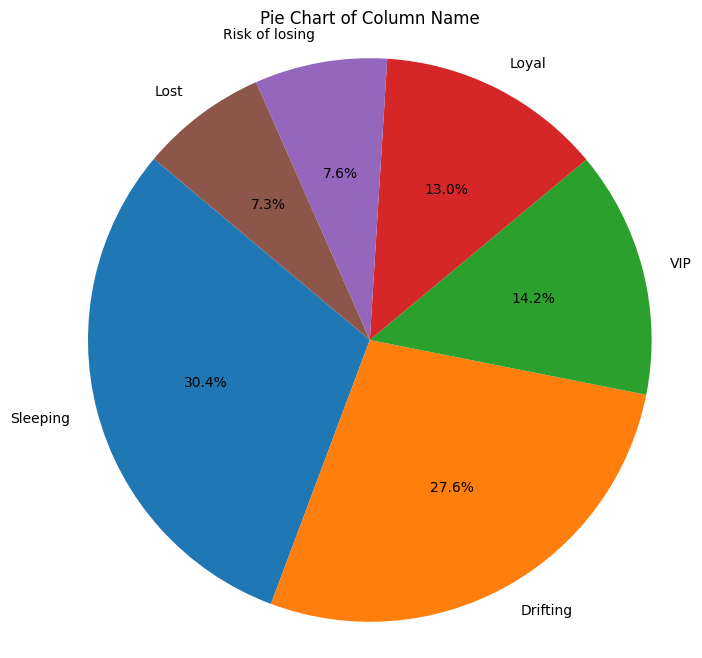

In [ ]:
value_counts = df['level_of_loyalty'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Column Name')
plt.axis('equal')
plt.show()

In [ ]:


loyalty_means = df.groupby('level_of_loyalty')[columns_num].mean()

print(loyalty_means)


                       DTI  FULL_AGE_CHILD_NUMBER  Period_at_work        age  \
level_of_loyalty                                                               
Drifting          0.406244               0.493558       58.369673  36.268583   
Lost              0.331541               0.616541       60.161654  37.635338   
Loyal             0.426139               0.540084       63.301688  36.945148   
Risk of losing    0.355683               0.546763       51.586331  35.266187   
Sleeping          0.381888               0.496403       49.002698  34.515288   
VIP               0.440927               0.476834       60.708494  35.945946   

                  max90days  max60days  max30days  max21days  max14days  \
level_of_loyalty                                                          
Drifting           1.502478   1.041625   0.716551   0.513380   0.408325   
Lost               1.176692   0.962406   0.793233   0.684211   0.616541   
Loyal              1.913502   1.242616   0.894515   0.61603

In [ ]:


loyalty_means = df.groupby('level_of_loyalty')[new_cat_columns].median()

# Print or display the resulting DataFrame
print(loyalty_means)


                  EMPL_PROPERTY_Другое  \
level_of_loyalty                         
Drifting                           0.0   
Lost                               0.0   
Loyal                              0.0   
Risk of losing                     0.0   
Sleeping                           0.0   
VIP                                0.0   

                  EMPL_PROPERTY_Информационные технологии  \
level_of_loyalty                                            
Drifting                                              0.0   
Lost                                                  0.0   
Loyal                                                 0.0   
Risk of losing                                        0.0   
Sleeping                                              0.0   
VIP                                                   0.0   

                  EMPL_PROPERTY_Сельское и лесное хозяйство  \
level_of_loyalty                                              
Drifting                                        

### so, as we can see the obtained clusters are not very different from each other. But we can distinguish several significant differences: VIP clients use the account more often than others, mostly representatives of VIP class are women, while in other classes men prevail, in the Risk of losing class it is impossible to determine what the loan is for.
### there are currently three groups with loan debt: Drifting, Loyal, VIP. Other groups have no debt at the moment.
### In my opinion, the division is quite successful, because evaluating the parameter own_closed (number of closed credits) we see that VIP clients have the most closed credits, and the least of all LOST category, which is logical (with the decrease of loyalty level the number of closed credits decreases).

# **Results**

### there were two studies in which we divided customers into clusters.
### In my opinion, the RFM metric gives inaccurate results (the segments turn out to be very similar in description), which are difficult to interpret. the KMeans method is much better at dealing with this problem, and the results are more plausible.
### As a result, a table with clustered and segmented service users can be downloaded.

In [ ]:

df.to_csv('result.csv', index=False)